In [1]:
!pip install qiskit qiskit_aer


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Niranjan P\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
# Grover's Search Algorithm using Qiskit 2.x

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)  # use mcx() in Qiskit 2.x
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

In [4]:
def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state):
    """Builds Grover's search circuit for a given marked state."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

In [5]:
def run_grover(qc):
    """Executes the Grover circuit and displays the result."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()

if __name__ == "__main__":
    marked_state = "101"
    print("Searching for marked state:", marked_state)
    qc = grover_search(marked_state)
    print(qc.draw(fold=-1))
    run_grover(qc)

Searching for marked state: 101
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [6]:
#  TASK 0: Setup Environment
!pip install qiskit qiskit_aer --quiet

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Niranjan P\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [7]:
#  TASK 0A: Define Oracle, Diffuser, and Runner Functions
def oracle(qc, n, marked_state):
    """Constructs the oracle for the marked state."""
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def diffuser(qc, n):
    """Implements the Grover diffuser."""
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))

def grover_search(marked_state, iterations=1):
    """Builds Grover's search circuit for a given marked state and iteration count."""
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    for _ in range(iterations):
        oracle(qc, n, marked_state)
        diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

def run_grover(qc):
    """Runs the circuit on the simulator and shows histogram."""
    simulator = AerSimulator()
    compiled_circuit = transpile(qc, simulator)
    result = simulator.run(compiled_circuit, shots=1024).result()
    counts = result.get_counts()
    plot_histogram(counts)
    plt.show()


In [8]:
#  TASK 1: Change the marked state (try 001, 010, 111, etc.)
marked_state = "111"  # Change to "001", "010", etc.
print(f"🔍 Searching for marked state: {marked_state}")
qc = grover_search(marked_state)
print(qc.draw(fold=-1))
run_grover(qc)


🔍 Searching for marked state: 111
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤       │  ├───┤├───┤            │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║ └╥┘
c: 3/════════════════════════════════════════════════════════╩══╩══╩═
                                                             0  1  2 


In [9]:
#  TASK 2: Extend the algorithm to 4 qubits
marked_state = "1010"  # 4-bit marked state

def oracle_4qubit(qc, n, marked_state):
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    for i, bit in enumerate(marked_state):
        if bit == "0":
            qc.x(i)

def grover_search_4qubit(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n, n)
    qc.h(range(n))
    oracle_4qubit(qc, n, marked_state)
    diffuser(qc, n)
    qc.measure(range(n), range(n))
    return qc

qc4 = grover_search_4qubit(marked_state)
print(qc4.draw(fold=-1))
run_grover(qc4)


     ┌───┐               ┌───┐┌───┐                    ┌───┐┌───┐     ┌─┐         
q_0: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├─────┤M├─────────
     ├───┤┌───┐       │  ├───┤├───┤┌───┐            │  ├───┤├───┤     └╥┘┌─┐      
q_1: ┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├────────────■──┤ X ├┤ H ├──────╫─┤M├──────
     ├───┤└───┘       │  ├───┤├───┤└───┘            │  ├───┤├───┤      ║ └╥┘┌─┐   
q_2: ┤ H ├────────────■──┤ H ├┤ X ├─────────────────■──┤ X ├┤ H ├──────╫──╫─┤M├───
     ├───┤┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐┌───┐┌───┐┌─┴─┐├───┤├───┤┌───┐ ║  ║ └╥┘┌─┐
q_3: ┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├─╫──╫──╫─┤M├
     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════════════════════════════════════╩══╩══╩══╩═
                                                                       0  1  2  3 


In [10]:
#  TASK 3: Run oracle + diffuser multiple times to improve detection probability
marked_state = "101"
iterations = 3  # Try 1, 2, 3 iterations and compare results
print(f" Grover's Algorithm with {iterations} iterations for marked state '{marked_state}'")
qc = grover_search(marked_state, iterations)
print(qc.draw(fold=-1))
run_grover(qc)


 Grover's Algorithm with 3 iterations for marked state '101'
     ┌───┐          ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐               ┌───┐┌───┐     ┌─┐      
q_0: ┤ H ├───────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├────────────■──┤ H ├┤ X ├────────────■──┤ X ├┤ H ├─────┤M├──────
     ├───┤┌───┐  │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤┌───┐       │  ├───┤├───┤     └╥┘┌─┐   
q_1: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├┤ X ├───────■──┤ X ├┤ H ├──────╫─┤M├───
     ├───┤├───┤┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤├───┤┌───┐┌─┴─┐├───┤├───┤┌───┐ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H ├┤ H ├┤ X ├┤ H 

In [11]:
!pip install pylatexenc --quiet




[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Niranjan P\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [12]:
#  TASK 4: Visualize the circuit structure using Matplotlib (requires pylatexenc)
!pip install qiskit qiskit_aer pylatexenc --quiet



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Niranjan P\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


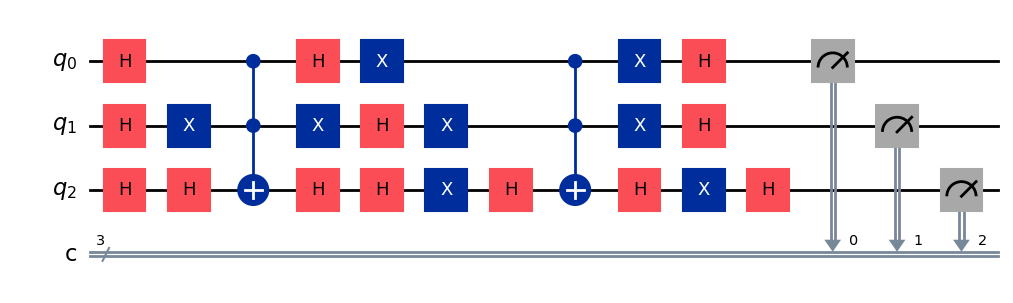

In [13]:
marked_state = "101"
qc = grover_search(marked_state)
qc.draw('mpl')



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Niranjan P\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


✅ Grover's Algorithm with Noise Model (Results):
{'111': 116, '101': 173, '110': 121, '011': 116, '000': 125, '100': 117, '001': 131, '010': 125}


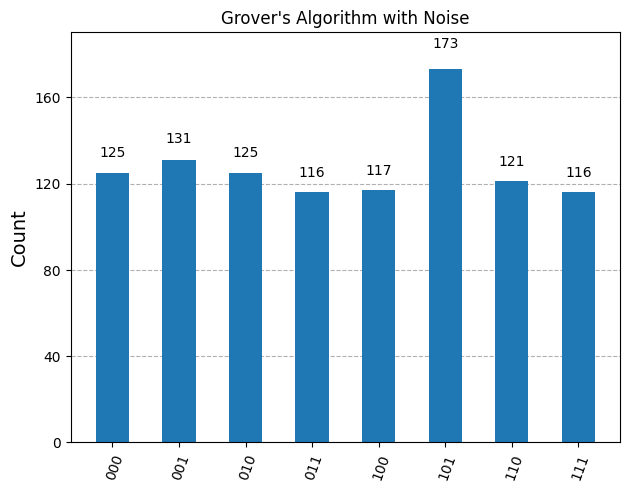

In [14]:
# ✅ TASK 5: Add a Noise Model and compare results with the ideal simulator
!pip install qiskit qiskit-aer matplotlib pylatexenc --quiet

# --- Imports ---
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# --- Ensure inline display ---
%matplotlib inline

# --- Define Grover function ---
def grover_search(marked_state):
    n = len(marked_state)
    qc = QuantumCircuit(n + 1, n)
    qc.h(range(n))
    qc.x(n)
    qc.h(n)
    qc.barrier()
    # Oracle
    for i, bit in enumerate(marked_state):
        if bit == '0':
            qc.x(i)
    qc.mcx(list(range(n)), n)
    for i, bit in enumerate(marked_state):
        if bit == '0':
            qc.x(i)
    qc.barrier()
    # Diffuser
    qc.h(range(n))
    qc.x(range(n))
    qc.h(n - 1)
    qc.mcx(list(range(n - 1)), n - 1)
    qc.h(n - 1)
    qc.x(range(n))
    qc.h(range(n))
    qc.barrier()
    qc.measure(range(n), range(n))
    return qc

# --- Create noise model ---
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.05, 1), ['x', 'h'])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.1, 2), ['cx'])

# --- Run noisy Grover simulation ---
marked_state = "101"
qc = grover_search(marked_state)
simulator = AerSimulator(noise_model=noise_model)
compiled = transpile(qc, simulator)
result = simulator.run(compiled, shots=1024).result()
counts = result.get_counts()

# --- Display results ---
print("✅ Grover's Algorithm with Noise Model (Results):")
print(counts)

plot_histogram(counts)
plt.title("Grover's Algorithm with Noise")
plt.show()
